<b>Jingping Yu   USCID:6205835871

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


(a) Choose 70% of the data randomly as the training set.

In [25]:
data = pd.read_csv("../data/Anuran Calls (MFCCs)/Frogs_MFCCs.csv")
# get rid of the last four columns
features = data.iloc[:, 0:22]
features

,MFCCs_ 1,MFCCs_ 2,MFCCs_ 3,MFCCs_ 4,MFCCs_ 5,MFCCs_ 6,MFCCs_ 7,MFCCs_ 8,MFCCs_ 9,MFCCs_10,...,MFCCs_13,MFCCs_14,MFCCs_15,MFCCs_16,MFCCs_17,MFCCs_18,MFCCs_19,MFCCs_20,MFCCs_21,MFCCs_22
0,1.0,0.152936,-0.105586,0.200722,0.317201,0.260764,0.100945,-0.150063,-0.171128,0.124676,...,-0.156436,0.082245,0.135752,-0.024017,-0.108351,-0.077623,-0.009568,0.057684,0.118680,0.014038
1,1.0,0.171534,-0.098975,0.268425,0.338672,0.268353,0.060835,-0.222475,-0.207693,0.170883,...,-0.254341,0.022786,0.163320,0.012022,-0.090974,-0.056510,-0.035303,0.020140,0.082263,0.029056
2,1.0,0.152317,-0.082973,0.287128,0.276014,0.189867,0.008714,-0.242234,-0.219153,0.232538,...,-0.237384,0.050791,0.207338,0.083536,-0.050691,-0.023590,-0.066722,-0.025083,0.099108,0.077162
3,1.0,0.224392,0.118985,0.329432,0.372088,0.361005,0.015501,-0.194347,-0.098181,0.270375,...,-0.317084,-0.011567,0.100413,-0.050224,-0.136009,-0.177037,-0.130498,-0.054766,-0.018691,0.023954
4,1.0,0.087817,-0.068345,0.306967,0.330923,0.249144,0.006884,-0.265423,-0.172700,0.266434,...,-0.298524,0.037439,0.219153,0.062837,-0.048885,-0.053074,-0.088550,-0.031346,0.108610,0.079244
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7190,1.0,-0.554504,-0.337717,0.035533,0.034511,0.443451,0.093889,-0.100753,0.037087,0.081075,...,-0.145668,-0.059364,0.024206,-0.000861,0.069430,0.071001,0.021591,0.052449,-0.021860,-0.079860
7191,1.0,-0.517273,-0.370574,0.030673,0.068097,0.402890,0.096628,-0.116460,0.063727,0.089034,...,-0.164675,-0.105600,0.030767,0.006457,0.061127,0.068978,0.017745,0.046461,-0.015418,-0.101892
7192,1.0,-0.582557,-0.343237,0.029468,0.064179,0.385596,0.114905,-0.103317,0.070370,0.081317,...,-0.150025,-0.078615,0.024861,0.008696,0.082474,0.077771,-0.009688,0.027834,-0.000531,-0.080425
7193,1.0,-0.519497,-0.307553,-0.004922,0.072865,0.377131,0.086866,-0.115799,0.056979,0.089316,...,-0.153120,-0.075320,0.022903,0.001924,0.051796,0.069073,0.017963,0.041803,-0.027911,-0.096895


In [26]:

labels = data.iloc[:,22:25]
labels

,Family,Genus,Species
0,Leptodactylidae,Adenomera,AdenomeraAndre
1,Leptodactylidae,Adenomera,AdenomeraAndre
2,Leptodactylidae,Adenomera,AdenomeraAndre
3,Leptodactylidae,Adenomera,AdenomeraAndre
4,Leptodactylidae,Adenomera,AdenomeraAndre
...,...,...,...
7190,Hylidae,Scinax,ScinaxRuber
7191,Hylidae,Scinax,ScinaxRuber
7192,Hylidae,Scinax,ScinaxRuber
7193,Hylidae,Scinax,ScinaxRuber


In [27]:
# factorize each label
# DON'T RUN THIS TWICE!
labels['Family'], family_labels = pd.factorize(labels['Family'])
labels['Genus'], genus_labels = pd.factorize(labels['Genus'])
labels['Species'], species_labels = pd.factorize(labels['Species'])

In [29]:
print(family_labels)
print(genus_labels)
print(species_labels)

Index(['Leptodactylidae', 'Dendrobatidae', 'Hylidae', 'Bufonidae'], dtype='object')
Index(['Adenomera', 'Ameerega', 'Dendropsophus', 'Hypsiboas', 'Leptodactylus',
       'Osteocephalus', 'Rhinella', 'Scinax'],
      dtype='object')
Index(['AdenomeraAndre', 'Ameeregatrivittata', 'AdenomeraHylaedactylus',
       'HylaMinuta', 'HypsiboasCinerascens', 'HypsiboasCordobae',
       'LeptodactylusFuscus', 'OsteocephalusOophagus', 'Rhinellagranulosa',
       'ScinaxRuber'],
      dtype='object')


In [31]:
labels

,Family,Genus,Species
0,0,0,0
1,0,0,0
2,0,0,0
3,0,0,0
4,0,0,0
...,...,...,...
7190,2,7,9
7191,2,7,9
7192,2,7,9
7193,2,7,9


In [32]:
from sklearn.model_selection import train_test_split

# get 70% of the records randomly from the dataset
xtrain, xtest, ytrain, ytest = train_test_split(features, labels, test_size=0.3, random_state = 0)

In [33]:
xtrain

,MFCCs_ 1,MFCCs_ 2,MFCCs_ 3,MFCCs_ 4,MFCCs_ 5,MFCCs_ 6,MFCCs_ 7,MFCCs_ 8,MFCCs_ 9,MFCCs_10,...,MFCCs_13,MFCCs_14,MFCCs_15,MFCCs_16,MFCCs_17,MFCCs_18,MFCCs_19,MFCCs_20,MFCCs_21,MFCCs_22
854,1.000000,-0.110506,0.296575,0.572484,0.106014,0.071651,0.026353,-0.057816,0.152764,0.184266,...,-0.003411,0.122159,0.188889,-0.048002,-0.197944,0.002446,0.106280,-0.000289,-0.030885,-0.013138
4279,1.000000,0.220624,0.242714,0.687612,0.278120,0.048901,-0.175033,0.045482,0.194987,-0.026137,...,0.239639,-0.258718,-0.181393,0.224083,0.189132,-0.086415,-0.142950,-0.061968,0.140081,0.177679
6530,1.000000,0.537389,0.411925,0.220964,0.082649,0.116707,0.030271,-0.025917,0.095736,0.055280,...,0.071234,-0.047150,-0.027571,0.040844,0.008839,0.020528,0.032644,-0.030302,-0.009163,0.073411
4445,1.000000,0.113471,0.141275,0.510700,0.171047,0.004309,-0.152609,-0.014724,0.187484,-0.021925,...,0.231469,-0.201889,-0.133748,0.223116,0.169808,-0.124180,-0.159812,-0.033042,0.185773,0.165372
4218,1.000000,0.240949,0.216480,0.461523,0.117414,-0.062445,-0.130187,0.112749,0.340813,0.070309,...,0.266955,-0.147366,-0.291212,0.032346,0.178339,0.043587,-0.123294,-0.113868,0.099137,0.182885
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4931,1.000000,-0.142398,-0.135605,0.489808,0.346600,0.112585,0.022297,-0.050188,-0.039155,0.179645,...,-0.139727,0.206907,0.180459,-0.081065,-0.159301,-0.052028,0.050629,0.090996,0.076187,-0.029321
3264,1.000000,0.176691,0.010582,0.426816,0.159823,0.082286,-0.081110,0.071147,0.316694,0.125304,...,0.285737,0.008472,-0.254754,0.020172,0.245519,0.135507,-0.092764,-0.155646,0.041699,0.261644
1653,0.689976,1.000000,0.303498,0.320465,0.206091,0.334999,0.091622,0.184121,0.004056,0.002416,...,0.084504,0.019744,-0.110357,-0.097476,-0.036028,-0.066845,-0.007471,-0.004674,0.035157,0.028860
2607,1.000000,0.378678,0.430880,0.618243,0.075128,-0.008888,-0.106768,0.067784,0.266808,-0.084165,...,0.366652,-0.177005,-0.321548,0.112632,0.199011,-0.030374,-0.083440,-0.081388,0.101548,0.165429


In [34]:
ytrain

,Family,Genus,Species
854,1,1,1
4279,0,0,2
6530,2,3,5
4445,0,0,2
4218,0,0,2
...,...,...,...
4931,2,2,3
3264,0,0,2
1653,0,0,2
2607,0,0,2


(b) Each instance has three labels: Families, Genus, and Species. Each of the labels has multiple classes. We wish to solve a multi-class and multi-label problem. One of the most important approaches to multi-label classification is to train a classifier for each label (binary relevance). We first try this approach:
i. Research exact match and hamming score/ loss methods for evaluating multi- label classification and use them in evaluating the classifiers in this problem.

<b>Exact match: 
    it is an evaluation metrics for multi-label classification problems, with 1 when the model is perfect and 0 when the model is very bad. (correct prediction divided by the total numbers of examples)
<br>Hamming score/loss: an evaluation metrics computing the proportion of incorrectly predicted labels to the total numbers of labels. 

ii. Train a SVM for each of the labels, using Gaussian kernels and one versus all classifiers. Determine the weight of the SVM penalty and the width of the Gaussian Kernel using 10 fold cross validation.1 You are welcome to try to solve the problem with both standardized 2 and raw attributes and report the results.

In [39]:
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.metrics import hamming_loss
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore')

In [37]:
# standardize the training and test sets
xtrain_std = StandardScaler().fit_transform(xtrain)
xtest_std = StandardScaler().fit_transform(xtest)
# seperate each labels from the training the test sets
ytrain1 = ytrain['Family']
ytrain2 = ytrain['Genus']
ytrain3 = ytrain['Species']
ytest1 = ytest['Family']
ytest2 = ytest['Genus']
ytest3 = ytest['Species']

In [43]:
# build models for each label
model = SVC(kernel='rbf', max_iter = 1000, random_state=0)
paramC = np.logspace(-3,3,7)
paramGamma = np.logspace(-5,4,10)
model1 = GridSearchCV(model, {'C': paramC, 'gamma':paramGamma}, cv=10).fit(xtrain_std, ytrain1)
model2 = GridSearchCV(model, {'C': paramC, 'gamma':paramGamma}, cv=10).fit(xtrain_std, ytrain2)
model3 = GridSearchCV(model, {'C': paramC, 'gamma':paramGamma}, cv=10).fit(xtrain_std, ytrain3)

In [44]:
# find the best parameter C and gamma for each model
c1 = model1.best_params_['C']
gamma1 = model1.best_params_['gamma']
print("The best C parameter for Family is:", c1)
print("The best gamma parameter for Family is:", gamma1)

c2 = model2.best_params_['C']
gamma2 = model2.best_params_['gamma']
print("The best C parameter for Genus is:", c2)
print("The best gamma parameter for Genus is:", gamma2)

c3 = model3.best_params_['C']
gamma3 = model3.best_params_['gamma']
print("The best C parameter for Species is:", c3)
print("The best gamma parameter for Species is:", gamma3)


The best C parameter for Family is: 10.0
The best gamma parameter for Family is: 0.1
The best C parameter for Genus is: 10.0
The best gamma parameter for Genus is: 0.1
The best C parameter for Species is: 1000.0
The best gamma parameter for Species is: 0.01


In [45]:
# refit the best parameters into a new SVM model
svc1 = SVC(C=c1, gamma=gamma1,kernel='rbf', random_state=0).fit(xtrain_std, ytrain1)
svc2 = SVC(C=c2, gamma=gamma2,kernel='rbf', random_state=0).fit(xtrain_std, ytrain2)
svc3 = SVC(C=c3, gamma=gamma3,kernel='rbf', random_state=0).fit(xtrain_std, ytrain3)

In [47]:
# predict the result using the standardized test set
ypred1 = svc1.predict(xtest_std)
ypred2 = svc2.predict(xtest_std)
ypred3 = svc3.predict(xtest_std)

In [49]:
# get the hamming loss metrics for each model
ham1 = hamming_loss(ytest1, ypred1)
ham2 = hamming_loss(ytest2, ypred2)
ham3 = hamming_loss(ytest3, ypred3)
print("The hamming loss for Family is", ham1, ".\nThe hamming loss for Genus is", ham2, ".\nThe hamming loss for Species is", ham3)

The hamming loss for Family is 0.007410838351088467 .
The hamming loss for Genus is 0.010189902732746642 .
The hamming loss for Species is 0.012505789717461788


In [50]:
# get accuracy_score/exact match for each model
score1 = accuracy_score(ytest1, ypred1)
score2 = accuracy_score(ytest2, ypred2)
score3 = accuracy_score(ytest3, ypred3)
print("The exact match for Family is", score1, ".\nThe exact match for Genus is", score2, ".\nThe exact match for Species is", score3)

The exact match for Family is 0.9925891616489115 .
The exact match for Genus is 0.9898100972672533 .
The exact match for Species is 0.9874942102825383


iii. Repeat 1(b)ii with L1-penalized SVMs.3 Remember to standardize4 the at- tributes. Determine the weight of the SVM penalty using 10 fold cross vali- dation.

In [52]:
# the attributes are standardized in the previous question.
from sklearn.svm import LinearSVC
l1model = LinearSVC(penalty='l1', dual=False, random_state=0)

l1model1 = GridSearchCV(l1model, {'C':paramC}, cv=10).fit(xtrain_std, ytrain1)
l1model2 = GridSearchCV(l1model, {'C':paramC}, cv=10).fit(xtrain_std, ytrain2)
l1model3 = GridSearchCV(l1model, {'C':paramC}, cv=10).fit(xtrain_std, ytrain3)

In [53]:
# find the best parameter C fro each model
l1c1 = l1model1.best_params_['C']
print("The best C for Family is:", l1c1)
l1c2 = l1model2.best_params_['C']
print("The best C for Genus is:", l1c2)
l1c3 = l1model3.best_params_['C']
print("The best C for Species is:", l1c3)

The best C for Family is: 1.0
The best C for Genus is: 10.0
The best C for Species is: 1.0


In [56]:
# refit the model using the best C
l1svc1 = LinearSVC(penalty='l1', C=l1c1, dual=False, random_state=0).fit(xtrain_std, ytrain1)
l1svc2 = LinearSVC(penalty='l1', C=l1c2, dual=False, random_state=0).fit(xtrain_std, ytrain2)
l1svc3 = LinearSVC(penalty='l1', C=l1c3, dual=False, random_state=0).fit(xtrain_std, ytrain3)

In [57]:
# predict the result using the test set
ypred1 = l1svc1.predict(xtest_std)
ypred2 = l1svc2.predict(xtest_std)
ypred3 = l1svc3.predict(xtest_std)

In [58]:
# get the hamming loss for l1 svc
ham1 = hamming_loss(ytest1, ypred1)
ham2 = hamming_loss(ytest2, ypred2)
ham3 = hamming_loss(ytest3, ypred3)
print("The hamming loss for Family is", ham1, ".\nThe hamming loss for Genus is", ham2, ".\nThe hamming loss for Species is", ham3)

The hamming loss for Family is 0.06855025474756832 .
The hamming loss for Genus is 0.05094951366373321 .
The hamming loss for Species is 0.04307549791570171


In [59]:
# get the exact match for l1 svc
score1 = accuracy_score(ytest1, ypred1)
score2 = accuracy_score(ytest2, ypred2)
score3 = accuracy_score(ytest3, ypred3)
print("The exact match for Family is", score1, ".\nThe exact match for Genus is", score2, ".\nThe exact match for Species is", score3)

The exact match for Family is 0.9314497452524316 .
The exact match for Genus is 0.9490504863362668 .
The exact match for Species is 0.9569245020842982


iv. Repeat 1(b)iii by using SMOTE or any other method you know to remedy class imbalance. Report your conclusions about the classifiers you trained.

In [60]:
from imblearn.over_sampling import SMOTE
from sklearn.metrics import confusion_matrix

confusion_matrix(ytest1, ypred1)

array([[1280,   20,   27,    0],
       [   4,  143,    8,    0],
       [  63,    5,  588,    1],
       [   2,    0,   18,    0]])

In [61]:
confusion_matrix(ytest2, ypred2)

array([[1221,   11,    3,    4,    0,    0,    0,    1],
       [   3,  150,    1,    1,    0,    0,    0,    0],
       [  27,    4,   60,    5,    0,    0,    0,    0],
       [  19,    0,    0,  464,    2,    1,    0,    0],
       [   0,    0,    2,    4,   80,    1,    0,    0],
       [   3,    0,    0,   11,    0,   14,    0,    0],
       [   4,    0,    0,    1,    0,    0,   15,    0],
       [   1,    0,    0,    1,    0,    0,    0,   45]])

In [62]:
confusion_matrix(ytest3, ypred3)

array([[ 194,   11,    0,    1,    0,    4,    0,    0,    0,    1],
       [   1,  150,    0,    2,    0,    2,    0,    0,    0,    0],
       [   0,    0, 1029,    0,    0,    0,    0,    0,    0,    0],
       [  10,    6,    9,   68,    0,    3,    0,    0,    0,    0],
       [   3,    0,    0,    0,  143,    5,    0,    0,    0,    0],
       [   0,    0,    5,    0,    4,  319,    5,    1,    1,    0],
       [   1,    0,    0,    2,    0,    2,   82,    0,    0,    0],
       [   1,    0,    0,    0,    5,    5,    0,   17,    0,    0],
       [   1,    0,    1,    0,    0,    0,    0,    0,   18,    0],
       [   0,    0,    0,    0,    0,    0,    0,    0,    1,   46]])

In [63]:
# balance the training dataset using SMOTE

sm = SMOTE(random_state=0)
xtrain1_res, ytrain1_res = sm.fit_resample(xtrain_std, ytrain1)
xtrain2_res, ytrain2_res = sm.fit_resample(xtrain_std, ytrain2)
xtrain3_res, ytrain3_res = sm.fit_resample(xtrain_std, ytrain3)

In [64]:
# refit l1 penalized SVM using balanced dataset
l1model = LinearSVC(penalty='l1', dual=False, random_state=0)

l1model1 = GridSearchCV(l1model, {'C':paramC}, cv=10).fit(xtrain1_res, ytrain1_res)
l1model2 = GridSearchCV(l1model, {'C':paramC}, cv=10).fit(xtrain2_res, ytrain2_res)
l1model3 = GridSearchCV(l1model, {'C':paramC}, cv=10).fit(xtrain3_res, ytrain3_res)

In [65]:
# find the best parameter C fro each model
l1c1 = l1model1.best_params_['C']
print("The best C for Family is:", l1c1)
l1c2 = l1model2.best_params_['C']
print("The best C for Genus is:", l1c2)
l1c3 = l1model3.best_params_['C']
print("The best C for Species is:", l1c3)

The best C for Family is: 10.0
The best C for Genus is: 1000.0
The best C for Species is: 100.0


In [66]:
# refit the model using the best C
l1svc1 = LinearSVC(penalty='l1', C=l1c1, dual=False, random_state=0).fit(xtrain_std, ytrain1)
l1svc2 = LinearSVC(penalty='l1', C=l1c2, dual=False, random_state=0).fit(xtrain_std, ytrain2)
l1svc3 = LinearSVC(penalty='l1', C=l1c3, dual=False, random_state=0).fit(xtrain_std, ytrain3)

In [67]:
# predict the result using the test set
ypred1 = l1svc1.predict(xtest_std)
ypred2 = l1svc2.predict(xtest_std)
ypred3 = l1svc3.predict(xtest_std)

In [68]:
# get the hamming loss for l1 svc
ham1 = hamming_loss(ytest1, ypred1)
ham2 = hamming_loss(ytest2, ypred2)
ham3 = hamming_loss(ytest3, ypred3)
print("The hamming loss for Family is", ham1, ".\nThe hamming loss for Genus is", ham2, ".\nThe hamming loss for Species is", ham3)

The hamming loss for Family is 0.06716072255673923 .
The hamming loss for Genus is 0.05094951366373321 .
The hamming loss for Species is 0.041685965724872626


In [69]:
# get the exact match for l1 svc
score1 = accuracy_score(ytest1, ypred1)
score2 = accuracy_score(ytest2, ypred2)
score3 = accuracy_score(ytest3, ypred3)
print("The exact match for Family is", score1, ".\nThe exact match for Genus is", score2, ".\nThe exact match for Species is", score3)

The exact match for Family is 0.9328392774432608 .
The exact match for Genus is 0.9490504863362668 .
The exact match for Species is 0.9583140342751274


2. K-Means Clustering on a Multi-Class and Multi-Label Data Set Monte-Carlo Simulation: Perform the following procedures 50 times, and report
the average and standard deviation of the 50 Hamming Distances that you calculate.

(a) Use k-means clustering on the whole Anuran Calls (MFCCs) Data Set (do not split the data into train and test, as we are not performing supervised learning in this exercise). Choose k ∈ {1, 2, . . . , 50} automatically based on one of the methods provided in the slides (CH or Gap Statistics or scree plots or Silhouettes) or any other method you know.


In [77]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

In [178]:
'''
find the optimal k with highest silhouette score
'''
def findK(num, Xtrain, i):
    # error warning: can't start with k = 1
    bestK = 2
    max_score = -1 # the minimum value can be taken for silhouette is -1
    for k in range(2, num + 1):
        clusterer = KMeans(n_clusters=k, random_state=i)
        cluster_labels = clusterer.fit_predict(Xtrain)
        # calculate silhouette average score for all samples
        silhouette_avg = silhouette_score(Xtrain, cluster_labels)
        # find max silhouette score and store it as best k
        if silhouette_avg > max_score:
            bestK = k
            max_score = silhouette_avg

    print(str(i),"--- The best k is:", bestK)
    return bestK

(b) In each cluster, determine which family is the majority by reading the true labels. Repeat for genus and species.

In [174]:
def majority_label(bestK, cluster_labels, Ytrain):
    
    # a dataframe store F,G,S labels respectively
    cluster_major = pd.DataFrame(columns=Ytrain.columns)
    # loop through each cluster (number). e.g. if K=4, then cluster numbers are 0,1,2,3
    for c in range(bestK):
        index = [i for i,d in enumerate(cluster_labels) if d == c]
        # cluster_sample: a df(3 columns) storing all the data points in a same cluster
        cluster_sample = Ytrain.iloc[index, :]
        # a list storing the label(majority) for each cluster 
        major_labels = []
        # iterate through each column: Family, Genus, and Species
        for label in Ytrain.columns:
            # loop through each column of the three labels and get the first(max) label name
            major = cluster_sample.loc[:, label].value_counts().index[0]
#             print(cluster_sample.loc[:, label].value_counts())
            major_labels.append(major)
#         print(major_labels)
        # add each cluster majority labels to the df 
        cluster_major.loc[c] = major_labels
        
    return cluster_major

(c) Now for each cluster you have a majority label triplet (family, genus, species). Calculate the average Hamming distance, Hamming score, and Hamming loss5 between the true labels and the labels assigned by clusters.


In [175]:
def hamming(cluster_major, cluster_labels, Ytrain):
   
    error = 0
    # loop through each cluster
    for c in range(len(cluster_major)):
        index = [i for i,d in enumerate(cluster_labels) if d == c]
        # find all true labels in the same cluster and loop through each triplet
        for label in Ytrain.loc[index].values:
            # if the true label doesn't equal to the predicted label(majority), count it as error
            if (label == cluster_major.loc[c].values).all():
                error+=1
                
    hamming_dist = error / Ytrain.shape[0]
    hamming_loss = error / (Ytrain.shape[0] * 3)
    hamming_score = 1-hamming_loss
    
    return hamming_dist, hamming_loss, hamming_score

In [182]:
'''
find optimal k and use KMeans clustering with different start point in each Monte Carlo simulation
total simulations:50
'''
def monteCarlo(Xtrain, Ytrain):
    ham_dist = []
    ham_loss = []
    ham_score = []
    
    for i in range(50):
        bestK = findK(50, Xtrain, i)
        # use different random_state to have random starting point
        clusterer = KMeans(n_clusters=bestK, random_state=i)
        # a list storing the cluster numbers (eg. k=4, the range for cluster number is 0-3)
        cluster_labels = clusterer.fit_predict(Xtrain)
        # cluster_major: a list containing the corresponding majority label for each cluster
        cluster_major = majority_label(bestK, cluster_labels, Ytrain)
        
        dist, loss, score = hamming(cluster_major, cluster_labels, Ytrain)
        ham_dist.append(dist)
        ham_loss.append(loss)
        ham_score.append(score)
        
        print("Hamming distance:", dist)
        print("Hamming loss:", loss)
        print("Hamming score:", score)
        
    return ham_dist, ham_loss, ham_score

In [183]:
ham_dist, ham_loss, ham_score = monteCarlo(features, labels)

0 --- The best k is: 4
Hamming distance: 0.7563585823488533
Hamming loss: 0.2521195274496178
Hamming score: 0.7478804725503823
1 --- The best k is: 4
Hamming distance: 0.7555246699096595
Hamming loss: 0.25184155663655317
Hamming score: 0.7481584433634468
2 --- The best k is: 4
Hamming distance: 0.6828353022932592
Hamming loss: 0.2276117674310864
Hamming score: 0.7723882325689135
3 --- The best k is: 4
Hamming distance: 0.7555246699096595
Hamming loss: 0.25184155663655317
Hamming score: 0.7481584433634468
4 --- The best k is: 4
Hamming distance: 0.7555246699096595
Hamming loss: 0.25184155663655317
Hamming score: 0.7481584433634468
5 --- The best k is: 4
Hamming distance: 0.7555246699096595
Hamming loss: 0.25184155663655317
Hamming score: 0.7481584433634468
6 --- The best k is: 4
Hamming distance: 0.7555246699096595
Hamming loss: 0.25184155663655317
Hamming score: 0.7481584433634468
7 --- The best k is: 4
Hamming distance: 0.7555246699096595
Hamming loss: 0.25184155663655317
Hamming scor

In [184]:
# calculate the average and standard deviation of 50 iterations
from statistics import mean
from statistics import stdev
# hamming distance
print("The average Hamming Distance is:", mean(ham_dist))
print("The standard deviation of Hamming Distance is:", stdev(ham_dist))
# hamming loss
print("The average Hamming Loss is:", mean(ham_loss))
print("The standard deviation of Hamming Loss is:", stdev(ham_loss))
# hamming score
print("The average Hamming Score is:", mean(ham_score))
print("The standard deviation of Hamming Score is:", stdev(ham_score))

The average Hamming Distance is: 0.7517359277275886
The standard deviation of Hamming Distance is: 0.0147752001331791
The average Hamming Loss is: 0.2505786425758629
The standard deviation of Hamming Loss is: 0.0049250667110596995
The average Hamming Score is: 0.7494213574241372
The standard deviation of Hamming Score is: 0.004925066711059694


<b>ISLR 12.6.2/10.7.2 for old version

(a) On the basis of this dissimilarity matrix, sketch the dendrogram that results from hierarchically clustering these four observa- tions using complete linkage. Be sure to indicate on the plot the height at which each fusion occurs, as well as the observations corresponding to each leaf in the dendrogram.

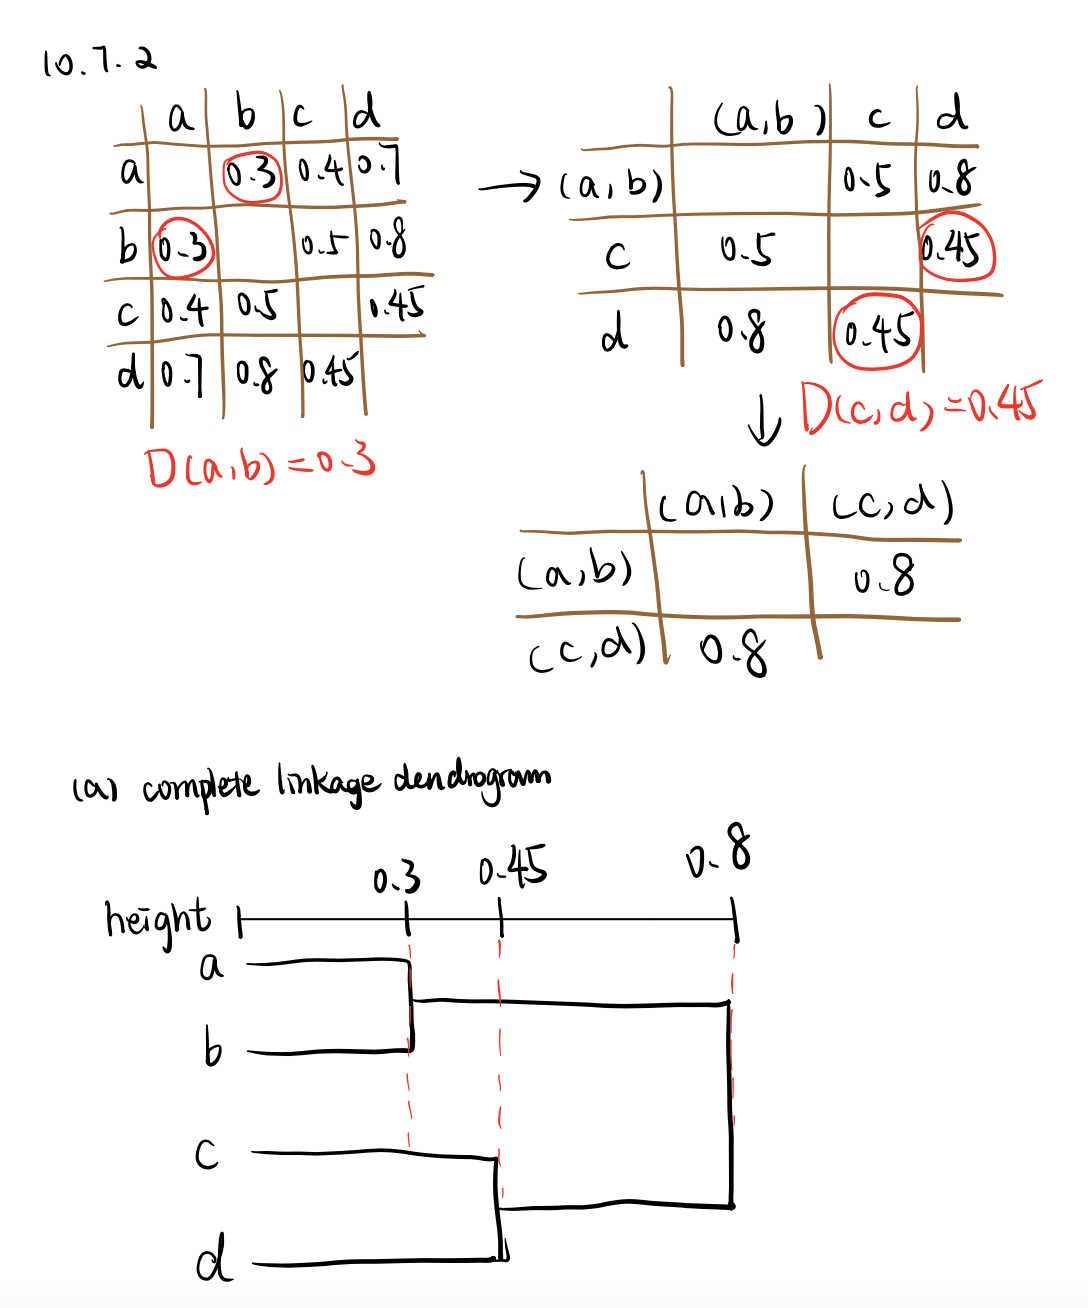

(b) Repeat (a), this time using single linkage clustering.

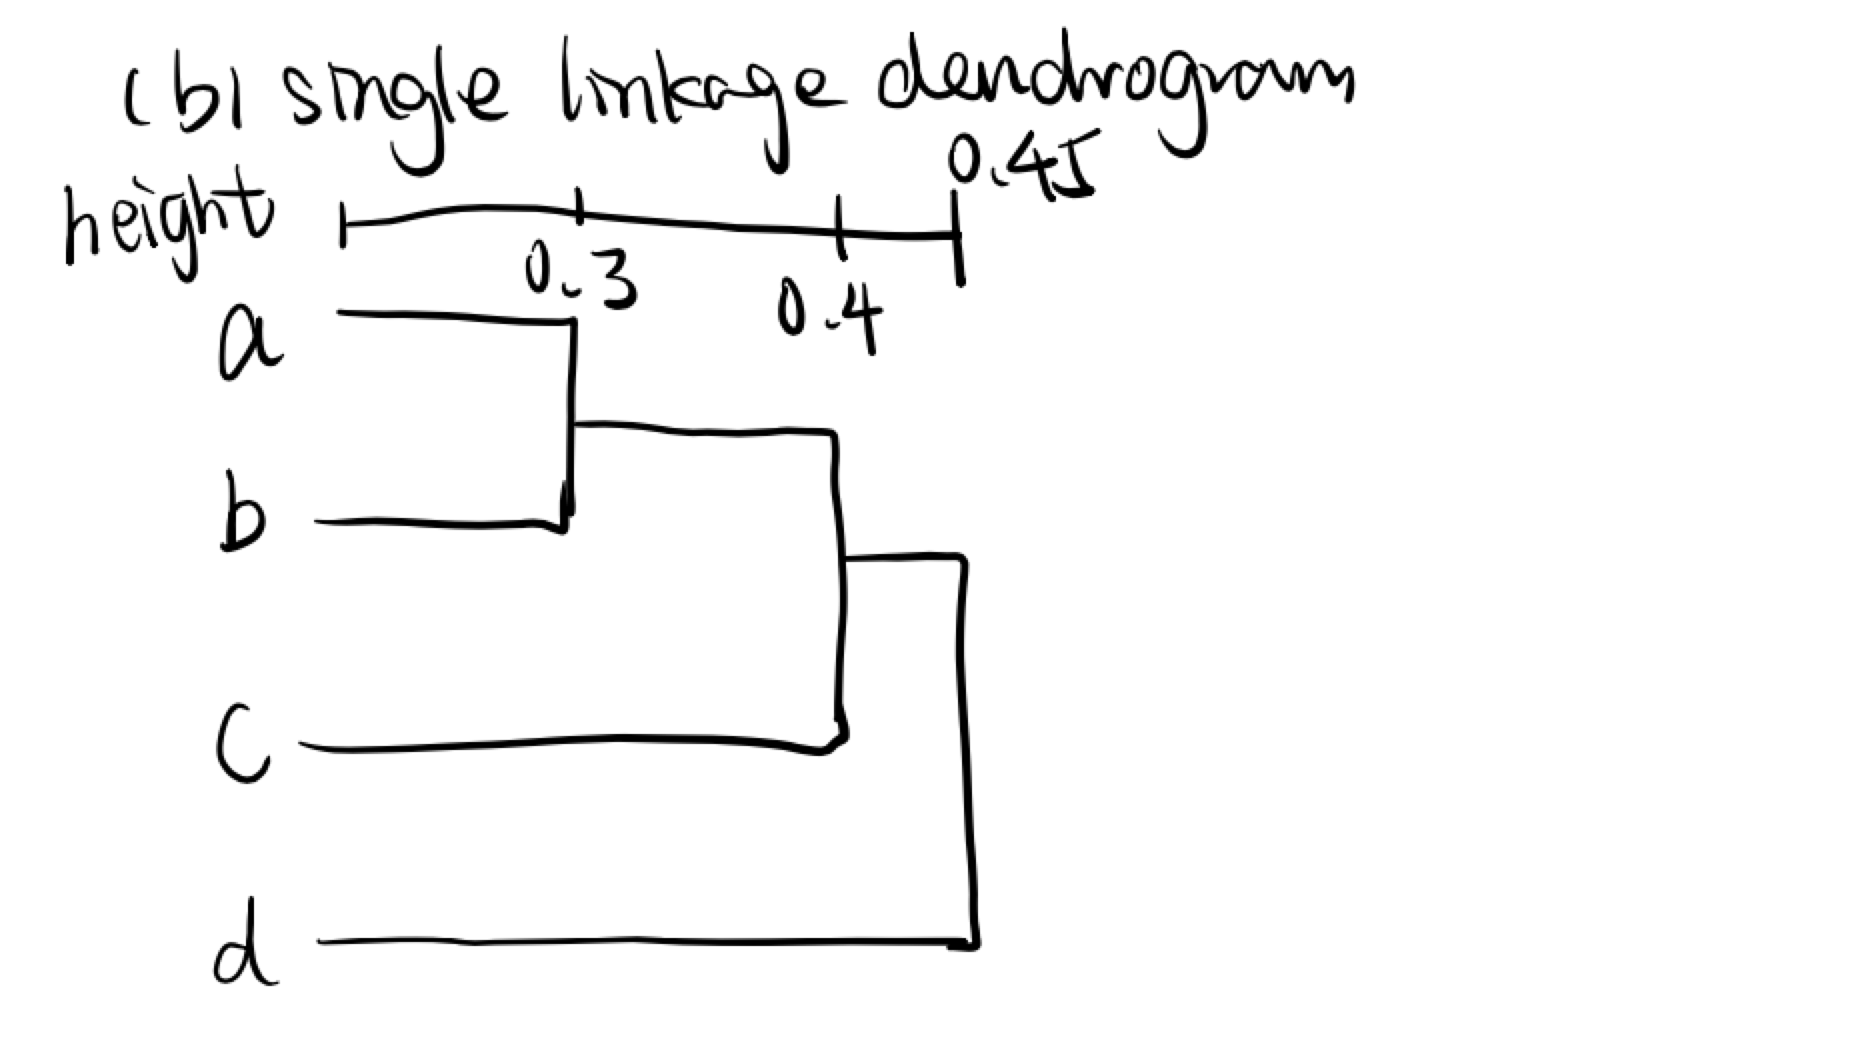

(c) Suppose that we cut the dendogram obtained in (a) such that two clusters result. Which observations are in each cluster?

There will be two clusters (a, b) and (c, d)

(d) Suppose that we cut the dendogram obtained in (b) such that two clusters result. Which observations are in each cluster?

There will be two clusters ((a,b),c) and (d).

(e) It is mentioned in the chapter that at each fusion in the den- drogram, the position of the two clusters being fused can be swapped without changing the meaning of the dendrogram. Draw a dendrogram that is equivalent to the dendrogram in (a), for which two or more of the leaves are repositioned, but for which the meaning of the dendrogram is the same.

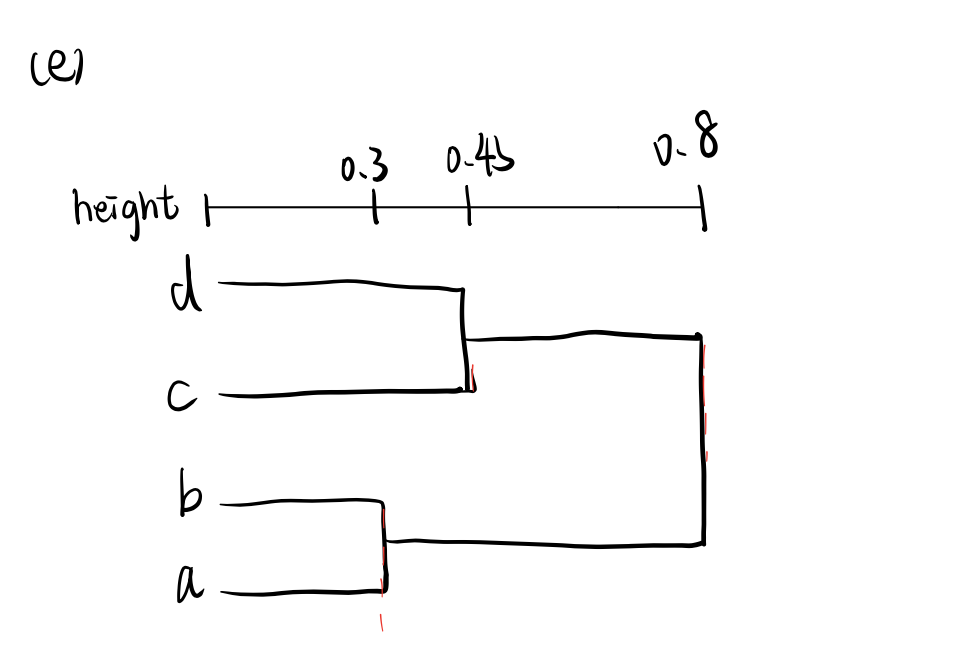